In [1]:
import sys
sys.path.insert(0, '../code/')
from dismod_db import DismodDB
from two_level import TwoLevel
from plot_two_level import PlotTwoLevel
import numpy as np
import pandas as pd
from dismod_output import DismodOutput

#### Build database

In [2]:
data = pd.read_csv('./data/diabetes_sinc_complete_loc.csv')

In [3]:
data.head()

,Unnamed: 0,location_id,X,sex,age_start,age_end,year_start,year_end,mean,standard_error,measure,ow,bmi,fpg,location_name,region_name
0,1,8,855,Female,30,44.0,2001,2002,0.000025,0.0001,Sincidence,0.271136,23.525415,5.100081,Taiwan,East Asia
1,2,8,859,Male,45,59.0,2007,2008,0.000005,0.0001,Sincidence,0.538278,24.704975,5.562921,Taiwan,East Asia
2,3,8,879,Female,30,44.0,2007,2008,0.000017,0.0001,Sincidence,0.306358,24.154000,5.032846,Taiwan,East Asia
3,4,8,883,Female,0,14.0,2003,2004,0.000058,0.0001,Sincidence,0.181352,23.763450,0.000000,Taiwan,East Asia
4,5,8,857,Female,0,14.0,2005,2006,0.000055,0.0001,Sincidence,0.184948,23.969006,0.000000,Taiwan,East Asia


In [4]:
integrand = ['Sincidence']
locations = ['Australia', 'New Zealand']
rates = ['iota']
meas_noise_density = {'Sincidence': {'density': 'gaussian'}}
rates_parent_priors = [
    # rate priors for iota
    ({'density':'uniform','upper':1.0,'lower':1e-16,'mean': .0001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .001})]
rates_child_priors = [({'density':'gaussian','mean': 0.0, 'std': .1}, None, None)]
covariates = [({'name':'bmi','type': 'rate_value','effected': 'iota'},None),
             ({'name': 'ow', 'type': 'rate_value', 'effected': 'iota'}, [10, 50])]
cov_priors = [{'density':'uniform','mean': 0.0, 'lower': -0.1, 'upper': 0.1}, 
              {'density':'uniform','mean': 0.0, 'lower': -10.0, 'upper': 10.0}]
#---------change path------------
path_to_db = './data/incidence_two_level_cov_test.db'

db = DismodDB(data, locations, integrand,rates, rates_parent_priors, 
              rates_child_priors, meas_noise_density, path_to_db, covariates=covariates, cov_priors=cov_priors)

#### Train model

In [5]:
model = TwoLevel(db)

In [6]:
model.fit_both(tol=1e-8, max_iter=20, fit_fixed=False)

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level_cov_test.db init
./data/incidence_two_level_cov_test.db fit both
./data/incidence_two_level_cov_test.db predict fit_var


#### Plots

In [2]:
path = './data/'
plt = PlotTwoLevel(path, 'incidence_two_level_cov_test.db')

locations: all
measurements: all
groups: all


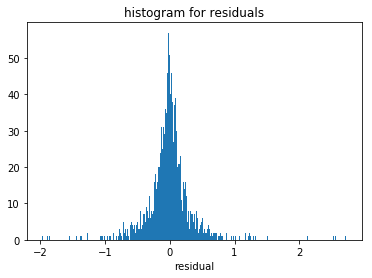

In [3]:
path_to_db = './data/incidence_two_level_cov_test.db'
plt.plot_residuals()

In [4]:
output = DismodOutput(path_to_db)
output.get_covariate_multiplier_values(['bmi', 'ow'])

,age,covariate_name,fit_var_value
3,45.0,bmi,0.042362
4,10.0,ow,4.756517
5,15.0,ow,1.170101
6,20.0,ow,2.727976
7,25.0,ow,2.863612
8,30.0,ow,0.974524
9,35.0,ow,3.442267
10,40.0,ow,-0.433641
11,45.0,ow,4.017220
12,50.0,ow,-0.523360


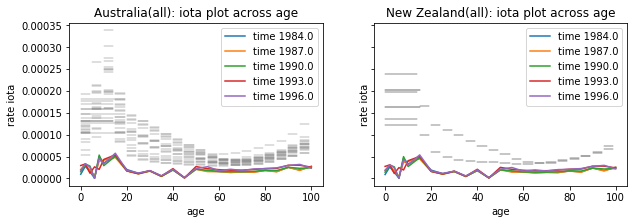

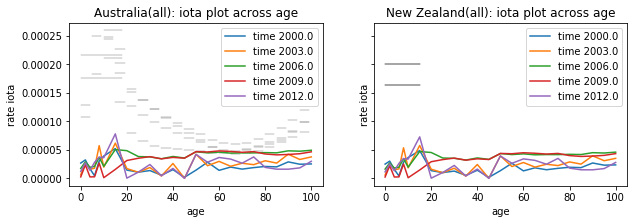

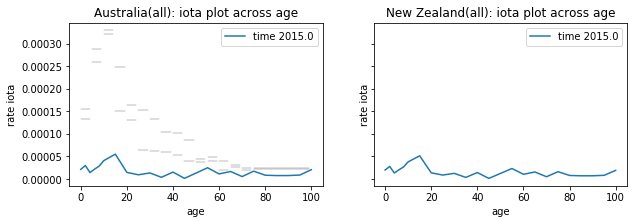

In [5]:
plt.plot_change_over_age('rate', 'iota', 'Sincidence', ['Australia', 'New Zealand'])

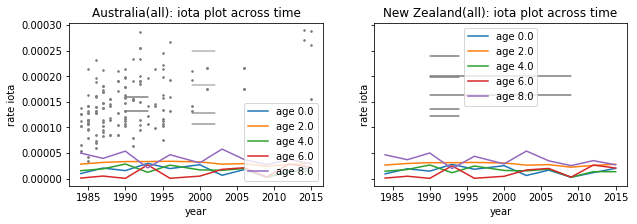

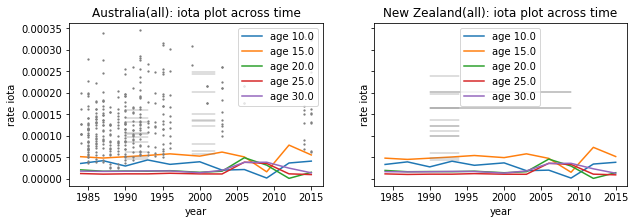

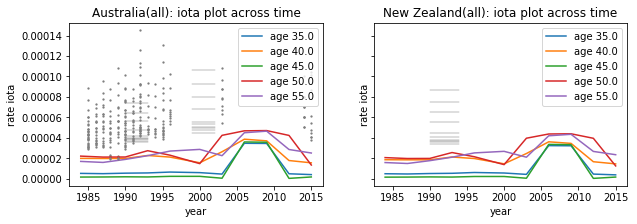

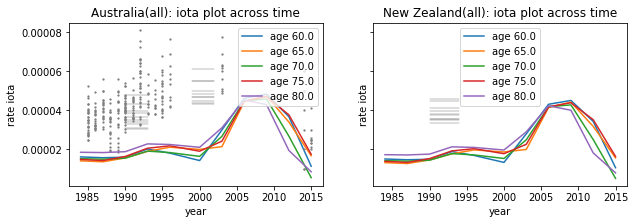

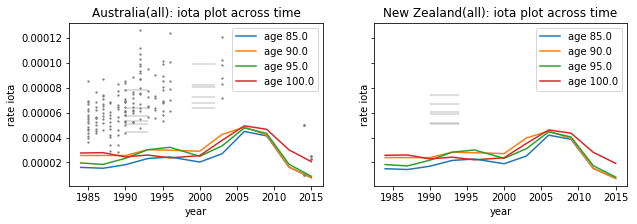

In [6]:
plt.plot_change_over_time('rate', 'iota', 'Sincidence', ['Australia', 'New Zealand'])

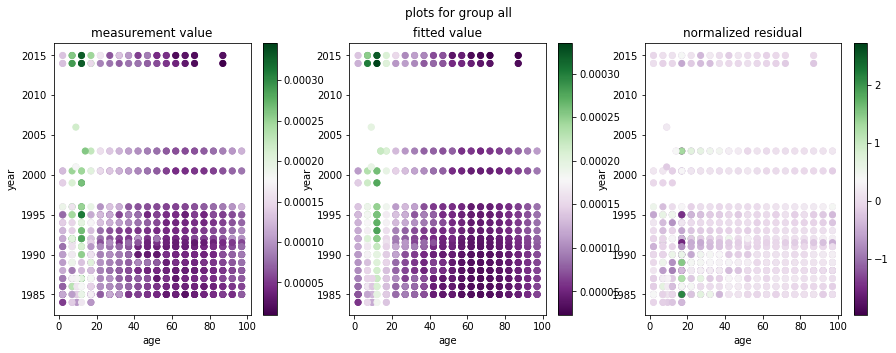

In [7]:
plt.plot_data_age_year_pattern('Australia', 'Sincidence')

In [6]:
# plt.integrand_values
#plt.data_values